<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Kouchakzade

**Student ID**: 400101837





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
# import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [11]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function.
    # You also need to make your code runnable on gpu!

    def __init__(self) :
        pass

    def fit(self,X,y,max_epoch,learning_rate,epsillon=1e-6,debuge=0) :
        self.__n , self.__intercept = X.shape[1] ,  0
        self.__coef = np.zeros((self.__n,1),dtype=np.float64)
        self.refit(X,y,max_epoch,learning_rate,epsillon,debuge)

    def refit(self,X,y,max_epoch,learning_rate,epsillon=1e-6,debuge=0) :
        y_pred , prev_log_loss = self.predict(X) , np.Inf
        for _ in range(max_epoch):
            coef , intercept = self.gradinet_descent(X,y,y_pred)
            self.__coef, self.__intercept = self.__coef - learning_rate * coef, self.__intercept - learning_rate * intercept
            y_pred , log_loss = self.predict(X) , self.loss(y,y_pred)
            if np.abs(prev_log_loss - log_loss) < epsillon : break
            prev_log_loss = log_loss
            if debuge > 1 : print(log_loss)
        if _ == max_epoch - 1 : print(f'max epoch reached')
        if debuge > 0 : print (f'log_loss : {log_loss:.4f} with {_} epochs \n')

    def predict(self,X):
        Z = X @ self.__coef + self.__intercept
        return np.array([ 1 / (1 + np.exp(-z)) for z in Z]).squeeze()

    def loss(self,y,y_pred) :
        return -np.mean(np.array([np.log(i) if y[indx] == 1 else np.log(1-i) for indx,i in enumerate(y_pred)]))

    def gradinet_descent(self,X,y,y_pred):
        return np.array([np.dot(y_pred - y,x_i) / X.shape[0] for x_i in X.T]).reshape(-1,1) , np.mean(y_pred - y)

    def get_param(self):
        return self.__coef.squeeze() , self.__intercept

    def set_param(self,coef,intercept):
        self.__coef , self.__intercept = coef , intercept

def metricts(cf_matrix_train , cf_matrix_test) :
    accuracy_train = np.trace(cf_matrix_train) / np.sum(cf_matrix_train) * 100
    accuracy_test = np.trace(cf_matrix_test) / np.sum(cf_matrix_test) * 100
    precision_train = cf_matrix_train[1,1] / (cf_matrix_train[1,1] + cf_matrix_train[0,1]) * 100
    precision_test = cf_matrix_test[1,1] / (cf_matrix_test[1,1] + cf_matrix_test[0,1]) * 100
    recall_train = cf_matrix_train[1,1] / (cf_matrix_train[1,1] + cf_matrix_train[1,0]) * 100
    recall_test = cf_matrix_test[1,1] / (cf_matrix_test[1,1] + cf_matrix_test[1,0]) * 100
    specificity_train = cf_matrix_train[0,0] / (cf_matrix_train[0,0] + cf_matrix_train[0,1]) * 100
    specificity_test = cf_matrix_test[0,0] / (cf_matrix_test[0,0] + cf_matrix_test[0,1]) * 100
    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, specificity_train, specificity_test

def plot_metrics(reg,X_train, X_test, y_train, y_test,title) :
    y_pred_train , y_pred_test= np.array(reg.predict(X_train) >= 0.5,dtype=np.int32) , np.array(reg.predict(X_test) > 0.5,dtype=np.int32)
    cf_matrix_train , cf_matrix_test= confusion_matrix(y_train,y_pred_train) ,  confusion_matrix(y_test,y_pred_test)
    acc_train,acc_test,prec_train,prec_test,recall_train,recall_test,spec_train,spec_test = metricts(cf_matrix_train , cf_matrix_test)
    fig , axes = plt.subplots(1,3,figsize = (13,3))
    plt.suptitle(title,y=1.05)
    axes[0].set_title("train") , axes[1].set_title("test")
    ConfusionMatrixDisplay(cf_matrix_train).plot(ax=axes[0])
    ConfusionMatrixDisplay(cf_matrix_test).plot(ax=axes[1])
    bar1 = plt.bar(np.arange(4) - 0.2,[acc_train,prec_train,recall_train,spec_train],label="train",width=0.4)
    bar2 = plt.bar(np.arange(4) + 0.2,[acc_test,prec_test,recall_test,spec_test],label="test",width=0.4)
    plt.xticks(np.arange(4),['accuracy','precision','recall','specificity'])
    plt.yticks(np.arange(0,101,20))
    plt.legend(loc = 'lower right')
    for indx,bar in enumerate([bar1, bar2]):
        for rect in bar:
            height = rect.get_height()
            if indx :
                plt.text(rect.get_x() + rect.get_width()/2, height - 7,f'{height:.1f}%',ha='center', va='bottom')
            else :
                plt.text(rect.get_x() + rect.get_width()/2, height,f'{height:.1f}%',ha='center', va='bottom')
    plt.show()

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

X_train shape : (320, 7) , y_train shape : (320,)
X_test shape : (80, 7) , y_test shape : (80,)
log_loss : 0.1352 with 506 epochs 



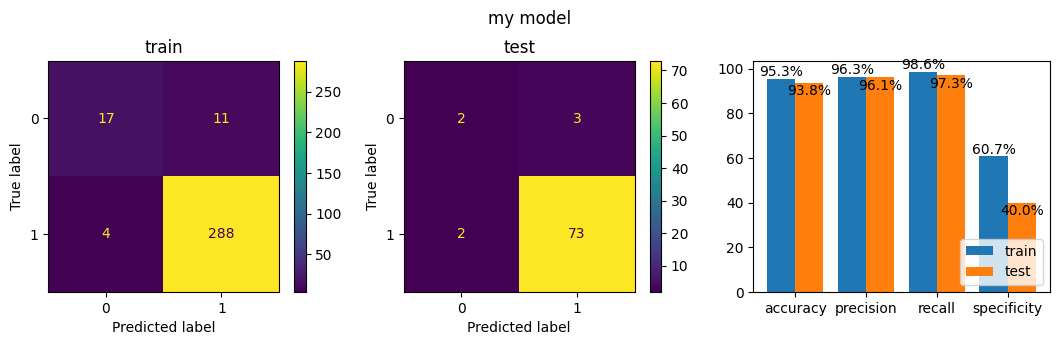

In [ ]:
# Your code goes here!
data = pd.read_csv('/content/Logistic_question.csv').to_numpy()
input , output = data[:,:7] , data[:,7]
y = np.array(output >= 0.5,dtype=np.int32)
scale  = MinMaxScaler()
X = scale.fit_transform(input)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 40)
print(f'X_train shape : {X_train.shape} , y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape} , y_test shape : {y_test.shape}')

reg = MyLogisticRegression()
reg.fit(X_train,y_train,1000,20)
plot_metrics(reg,X_train, X_test, y_train, y_test,'my model')

**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Accuracy:**

- Suitable for: Balanced datasets where classes are evenly distributed.
- Conveys: Overall correctness of the model in predicting both classes. However, accuracy alone might not be sufficient if the dataset is imbalanced.

**Precision:**

- Suitable for: When the cost of false positives is high.
- Conveys: How many of the positively predicted cases are actually positive. It's important in scenarios where false positives are costly or undesirable, such as medical diagnosis or fraud detection.

**Recall (Sensitivity):**

- Suitable for: When the cost of false negatives is high.
- Conveys: How many of the actual positives were captured by the model. It's crucial in scenarios where missing positive cases (false negatives) is more harmful, like in medical diagnosis or anomaly detection.

**Specificity (True Negative Rate):**

- Suitable for: When the focus is on avoiding false alarms.
- Conveys: How many of the actual negatives were correctly identified as negatives. It's important in situations where correctly identifying negatives is critical, like in security applications or quality control.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

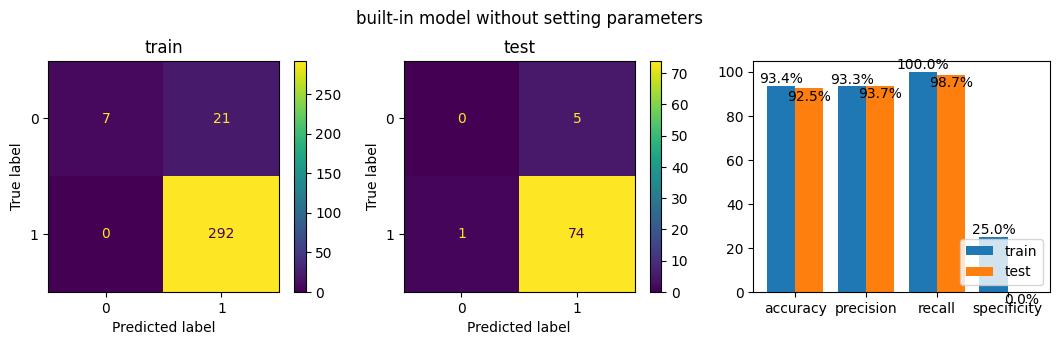

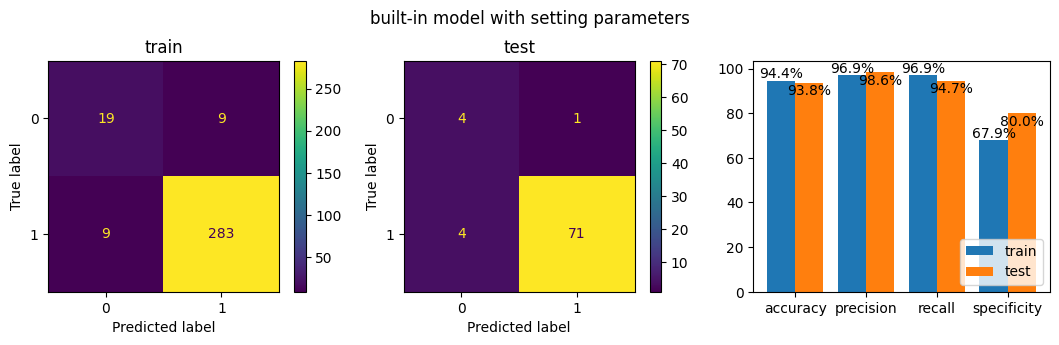

In [ ]:
# Your code goes here!
reg = LogisticRegression()
reg.fit(X_train,y_train)
plot_metrics(reg,X_train, X_test, y_train, y_test,'built-in model without setting parameters')
reg = LogisticRegression(class_weight={0:7,1:4},penalty='l2',C = 10,solver='lbfgs')
reg.fit(X_train,y_train)
plot_metrics(reg,X_train, X_test, y_train, y_test,'built-in model with setting parameters')

**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

I trained the built-in function twice. Initially, I trained it without setting parameters, resulting in poor performance and evident overfitting. Subsequently, after setting parameters, including a penalty to mitigate overfitting, the built-in function model exhibited improved performance. Upon comparison with my model, I observed that my model achieved higher accuracy and recall, whereas the built-in function model demonstrated superior precision and specificity.

1. **penalty**:
- Specifies the type of regularization to apply (either L1 or L2 regularization).
- Regularization helps prevent overfitting by adding a penalty term to the loss function.
- L1 regularization (Lasso) tends to produce sparse models by pushing some coefficients to zero, while L2 regularization (Ridge) penalizes large coefficients.

2. **C**:
- Inverse of regularization strength.
- Smaller values of C specify stronger regularization, penalizing larger coefficients more heavily.
- Larger values of C reduce the regularization strength, allowing the model to fit the training data more closely.

3. **solver**:
- Algorithm to use in the optimization problem.
- Different solvers are suitable for different problem sizes and structures.
- For smaller datasets, 'liblinear' is often a good choice, while 'sag' and 'saga' are faster for larger datasets.
- 'lbfgs' is also a good general-purpose solver.

4. **max_iter**:
- Maximum number of iterations taken for the solver to converge.
- Increasing this value may improve convergence, especially for large or complex datasets.
- However, setting it too high may lead to longer training times without significant improvement.

5. **class_weight**:
- Specifies the weights associated with classes in the target variable.
- Useful for handling imbalanced datasets, where one class may be more prevalent than others.
- It allows the model to adjust its learning process to focus more on the minority class.

6. **multi_class**:
- Determines the strategy to use for multiclass classification problems.
- Options include 'ovr' (one-vs-rest) or 'multinomial' (softmax).
- 'ovr' is suitable for binary classification or when classes are not mutually exclusive.
- 'multinomial' is appropriate when classes are mutually exclusive and the model needs to assign probabilities to each class.

7. **random_state**:
- Seed for random number generation, which affects the reproducibility of the results.
- Setting a specific random_state ensures that the same results are obtained each time the model is trained.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
# import necessary libraries


class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function.
    # You also need to make your code runnable on gpu!

    def __init__(self) :
        pass

    def fit(self,X,y,max_epoch,learning_rate) :
        X = np.insert(X,0,1,axis=1)
        self.__m , self.__n , self.__j = X.shape[0] , X.shape[1] , np.max(y) + 1
        self.__coef  = np.zeros((self.__n,self.__j),dtype = np.float64)
        y_pred , prev_log_loss = self.predict(X,True) , np.Inf
        for _ in range(max_epoch) :
            coef = self.__gradient_descent(X,y,y_pred)
            self.__coef = self.__coef - learning_rate * coef
            y_pred , log_loss = self.predict(X,True) , self.__loss(y,y_pred)
            if np.abs(prev_log_loss - log_loss) < 1e-6 : break
            prev_log_loss = log_loss
        if _ == max_epoch - 1 : print(f'max epoch reached')
        print (f'log_loss : {log_loss:.4f} with {_} epoch \n')

    def predict(self,X,training = False) :
        if not training : X = np.insert(X,0,1,axis=1)
        Z = np.exp(X @ self.__coef)
        return Z / np.sum(Z, axis=1).reshape(-1,1) if training else np.argmax(Z / np.sum(Z, axis=1).reshape(-1,1),axis=1)

    def __gradient_descent(self,X,y,y_pred) :
        return  X.T @ (y_pred - np.eye(self.__j)[y]) / self.__m

    def __loss(self,y,y_pred) :
        return - np.mean([np.log(x[y[indx]]) for indx,x in enumerate(y_pred)])

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

log_loss : 0.1352 with 435 epoch 

log_loss : 0.3066 with 667 epoch 

log_loss : 0.3884 with 1979 epoch 

log_loss : 0.4315 with 4230 epoch 

log_loss : 0.5366 with 4461 epoch 

log_loss : 0.6098 with 8108 epoch 

log_loss : 0.6794 with 11421 epoch 

log_loss : 0.7631 with 11355 epoch 

log_loss : 0.8329 with 15425 epoch 



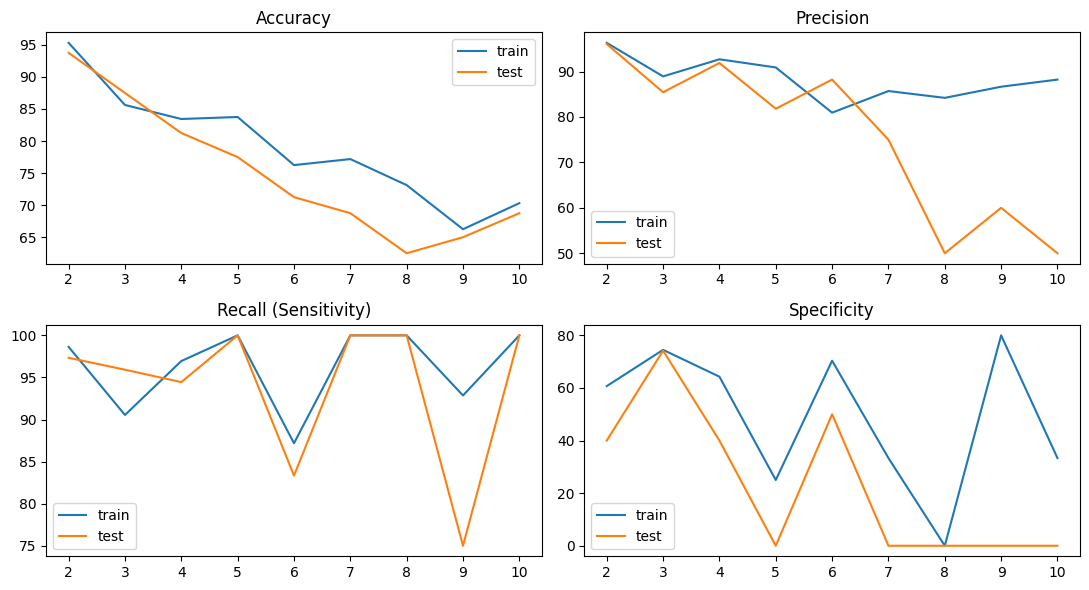

In [ ]:
# Your code goes here!
metric_history = np.zeros((8,9))
learning_rates = [12,4,3.2,2.88,2.8,2.7,2.28,2.48,2.38]
for indx,i in enumerate(range(2,11)):
    y = np.array(output / (1 / i),dtype=np.int32)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 40)
    reg = MyMultinomialLogisticRegression()
    reg.fit(X_train,y_train,20000,learning_rates[indx])
    y_pred_train , y_pred_test = reg.predict(X_train), reg.predict(X_test)
    cf_matrix_train , cf_matrix_test= confusion_matrix(y_train,y_pred_train) ,  confusion_matrix(y_test,y_pred_test)
    metr = np.array(metricts(cf_matrix_train , cf_matrix_test))
    metric_history[:,indx] = metr

plt.figure(figsize=(11,6))
title = ['Accuracy','Precision','Recall (Sensitivity)','Specificity']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(range(2,11),metric_history[2 * i,:],label = 'train')
    plt.plot(range(2,11),metric_history[2 * i +1,:], label = 'test')
    plt.title(title[i])
    plt.legend()
plt.tight_layout()
plt.show()

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

Based on visualization, I believe that the model where i = 4 exhibits the best performance. As i increases, the accuracy decreases, but we can assess it using other metrics. In the case of i = 4, we observe good values for precision, recall, and specificity.


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [3]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [4]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 22.6MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [5]:
# Your code goes here!
df = pd.read_csv('/content/adult.csv')
display(df.head())
unmasked_data = df.to_numpy()
print(f'unmasked_data shape : {unmasked_data.shape}')
print(f'number of null entries is = {np.sum(unmasked_data == "?")}')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


unmasked_data shape : (48842, 15)
number of null entries is = 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

Dealing with null entries in datasets is a crucial step in data preprocessing. Here are five common methods to handle null values:

1. **Dropping null values**:
- Simply remove rows or columns containing null values from the dataset.
- Use this method when the number of null values is small compared to the dataset size and when these rows or columns do not contain critical information.

2. **Imputation**:
- Fill null values with a specific value such as the mean, median, mode, or a constant.
- Imputation helps retain data points and can be useful when null values are present in critical features or when the null values are systematic rather than random.

3. **Forward fill or backward fill**:
- Fill null values with the value from the previous or next non-null entry in the dataset, respectively.
- This method is suitable when null values represent missing values in a time series or sequential data.

4. **Predictive models for imputation**:
- Use machine learning algorithms such as KNN or decision trees to predict missing values based on other features in the dataset.
- This method is more sophisticated and can be effective when the dataset is large and complex, and when the missing values are correlated with other features.

5. **Advanced imputation techniques**:
- Utilize more complex methods such as matrix factorization, iterative imputation, or deep learning-based imputation models.
- These methods are suitable for datasets with complex patterns of missing values or when standard imputation techniques are not sufficient.

**Because we have a large dataset, we can afford to disregard samples (rows) that contain null entries.**

**Task:** Handle null entries using your best method.

In [6]:
# Your code goes here!
mask = [not np.any(sample == '?') for sample in unmasked_data]
data = unmasked_data[mask]
print(f'{len(mask) - np.sum(mask)} ({(len(mask) - np.sum(mask)) / unmasked_data.shape[0] * 100:.2f} %) rows (samples) removed')
print(f'new data shape : {data.shape}')

3620 (7.41 %) rows (samples) removed
new data shape : (45222, 15)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

X shape : (45222, 14) , y shape : (45222,)


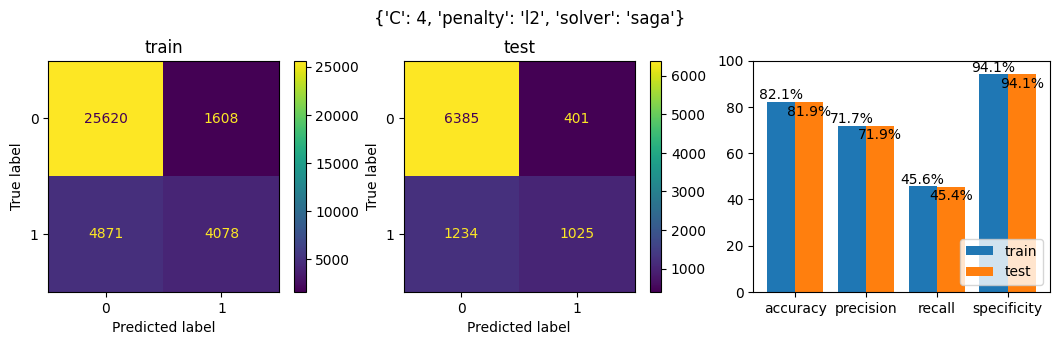

In [8]:
# Your code goes here!
feature_encode = [1,3,5,6,7,8,9,13,14]
le = LabelEncoder()
encoded_data = data.copy()
for encode in feature_encode:
    encoded_data[:,encode] = le.fit_transform(data[:,encode])
encoded_data = np.array(encoded_data,dtype =np.float64)
input , output = encoded_data[:,:14] , encoded_data[:,14]
scale = MinMaxScaler()
X , y = scale.fit_transform(input) , output.copy()
print(f'X shape : {X.shape} , y shape : {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 40)
grid_values = {'penalty': ['l1','l2'], 'C': 2 ** np.arange(11),'solver' : ['saga','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid=grid_values,cv = 5)
grid.fit(X_train,y_train)
plot_metrics(grid,X_train, X_test, y_train, y_test,f'{grid.best_params_}')

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

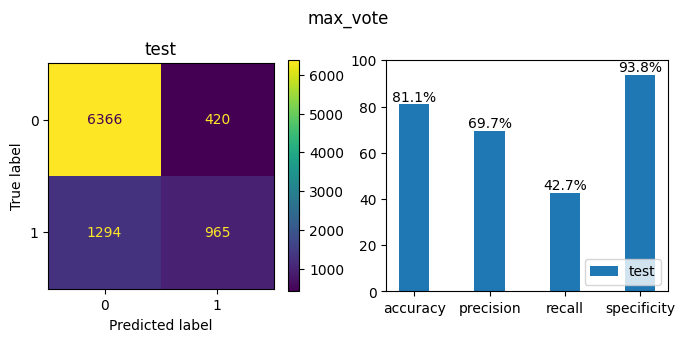

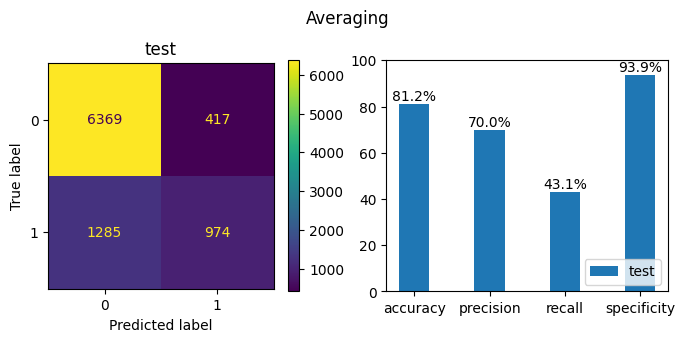

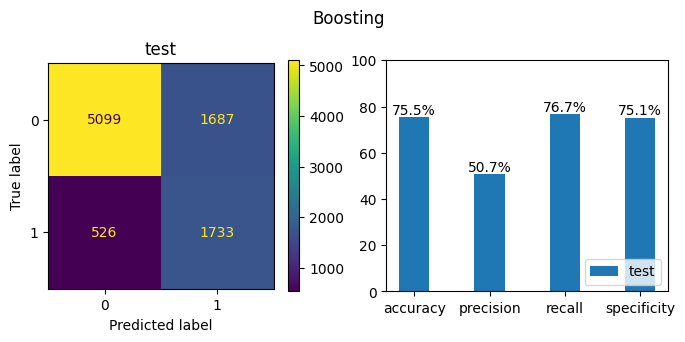

In [ ]:
# Your code goes here!
def plot_metrics2(y_test,y_pred_test,title) :
    cf_matrix_test= confusion_matrix(y_test,y_pred_test)
    accuracy_test = np.trace(cf_matrix_test) / np.sum(cf_matrix_test) * 100
    precision_test = cf_matrix_test[1,1] / (cf_matrix_test[1,1] + cf_matrix_test[0,1]) * 100
    recall_test = cf_matrix_test[1,1] / (cf_matrix_test[1,1] + cf_matrix_test[1,0]) * 100
    specificity_test = cf_matrix_test[0,0] / (cf_matrix_test[0,0] + cf_matrix_test[0,1]) * 100
    fig , axes = plt.subplots(1,2,figsize = (8,3))
    plt.suptitle(title,y=1.05)
    axes[0].set_title("test")
    ConfusionMatrixDisplay(cf_matrix_test).plot(ax=axes[0])
    bar = plt.bar(np.arange(4),[accuracy_test,precision_test,recall_test,specificity_test],label="test",width=0.4)
    plt.xticks(np.arange(4),['accuracy','precision','recall','specificity'])
    plt.yticks(np.arange(0,101,20))
    plt.legend(loc = 'lower right')
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height,f'{height:.1f}%',ha='center', va='bottom')
    plt.show()

i = 10
indices_sub = np.linspace(0,X_train.shape[0]-1,i + 1,dtype=np.int32)

def max_vote_avg(i,indices_sub):
    reg_list = []
    reg = MyLogisticRegression()
    coef_list = np.zeros((14,i))
    intercept_list = np.zeros(i)
    reg.fit(X_train[indices_sub[0]:indices_sub[1] , :],y_train[indices_sub[0]:indices_sub[1]],2000,2.2,1e-5)
    for sub in range(i):
        reg.refit(X_train[indices_sub[sub]:indices_sub[sub+1] , :],y_train[indices_sub[sub]:indices_sub[sub+1]],2000,2.2,1e-5)
        reg_list.append(reg)
        coef_list[:,sub] , intercept_list[sub] = reg.get_param()
    y_pred_prob_test_bag = np.zeros((i,X_test.shape[0]))
    for indx,reg in enumerate(reg_list):
        y_pred_prob_test_bag[indx,:] = reg.predict(X_test)
    plot_metrics2(y_test,np.round(np.mean(y_pred_prob_test_bag,axis=0)),'max_vote')
    reg.set_param(np.mean(coef_list,axis=1).reshape(-1,1),np.mean(intercept_list))
    y_pred_test_avg = reg.predict(X_test)
    plot_metrics2(y_test,np.round(y_pred_test_avg),'Averaging')

def boosting(i,indices_sub) :
    for sub in range(i) :
        X_sub , y_sub = X_train[indices_sub[sub]:indices_sub[sub+1] , :] , y_train[indices_sub[sub]:indices_sub[sub+1]]
        if sub == 0 :
            reg = MyLogisticRegression()
            reg.fit(X_sub,y_sub,2000,2.5,1e-5)
        else :
            X_sub , y_sub = np.vstack((X_sub,X_to_next_sub)) , np.hstack((y_sub,y_to_next_sub))
            reg.refit(X_sub,y_sub,2000,2 - 0.1 * sub,1e-5)
        compare = np.array(reg.predict(X_sub) >= 0.5,dtype=np.int32) == y_sub
        wrong_predict_indices = np.argwhere(compare == False).squeeze()
        X_to_next_sub , y_to_next_sub = X_sub[wrong_predict_indices,:] , y_sub[wrong_predict_indices]

    plot_metrics2(y_test,np.array(reg.predict(X_test) >= 0.5,dtype=np.int32),'Boosting')

max_vote_avg(i,indices_sub)
boosting(i,indices_sub)


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

First, I use the max vote technique, which acts as if we're training 10 independent models. We then apply these models to the test dataset and aggregate their predictions using a majority vote. In this approach, multiple models are utilized to make predictions for each data point, treating each model's prediction as a 'vote.' The final prediction is determined by the majority vote among the predictions of the individual models.

Next, I employ averaging. In this method, we calculate the average of parameters from all the models and utilize this average to make the final prediction. Both of these methods are employed when there is high variance and the aim is to reduce it and prevent overfitting.

The third method, boosting, is a sequential process in which each subsequent model attempts to correct the errors of the previous one. The succeeding models are dependent on the performance of the previous model. This method is utilized when there is high bias and the objective is to create a better-fitting model.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

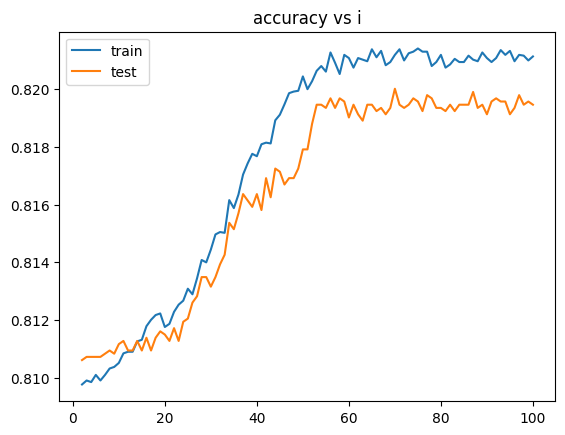

In [13]:
# Your code goes here!
def avg(reg,i,indices_sub):
    coef_list = np.zeros((14,i))
    intercept_list = np.zeros(i)
    for sub in range(i):
        reg.refit(X_train[indices_sub[sub]:indices_sub[sub+1] , :],y_train[indices_sub[sub]:indices_sub[sub+1]],2000,2.2,1e-4)
        coef_list[:,sub] , intercept_list[sub] = reg.get_param()
    reg.set_param(np.mean(coef_list,axis=1).reshape(-1,1),np.mean(intercept_list))
    y_pred_train_avg = np.array(reg.predict(X_train) > 0.5, dtype=np.int32)
    y_pred_test_avg = np.array(reg.predict(X_test) > 0.5, dtype=np.int32)
    return np.mean(y_pred_train_avg == y_train) , np.mean(y_pred_test_avg == y_test)

i_list = np.arange(2,101)
acc_history_train = []
acc_history_test = []
reg = MyLogisticRegression()
reg.fit(X_train[:20000, :],y_train[:20000],2000,2,1e-5)
for i in i_list:
    indices_sub = np.linspace(0,X_train.shape[0]-1,i + 1,dtype=np.int32)
    acc_train , acc_test = avg(reg,i,indices_sub)
    acc_history_train.append(acc_train) , acc_history_test.append(acc_test)

plt.plot(i_list,acc_history_train,label='train')
plt.plot(i_list,acc_history_test,label='test')
plt.legend()
plt.title('accuracy vs i')
plt.show()

**Question:** Analyze the results.

**Your Answer:**
In the previous section, the best model was determined to be the one obtained through averaging, so we applied it in this part. Averaging is an ensemble method that helps mitigate high variance (where the model fits well in training but not in testing). By increasing \( i \), we observe an increase in accuracy on the test data, indicating a reduction in high variance and prevention of overfitting. This aligns with the theoretical purpose of averaging methods.